#### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Data Visualization

In [5]:
data = pd.read_csv(r'../DataSet/onlinefraud.csv')
OnlinePayment_data= data.copy()

In [6]:
OnlinePayment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
OnlinePayment_data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
OnlinePayment_data.shape

(6362620, 11)

In [9]:
OnlinePayment_data.duplicated().sum()

0

In [10]:
OnlinePayment_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
OnlinePayment_data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [12]:
OnlinePayment_data['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [13]:
OnlinePayment_data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [14]:
OnlinePayment_data[['type', 'isFraud']].value_counts()

type      isFraud
CASH_OUT  0          2233384
PAYMENT   0          2151495
CASH_IN   0          1399284
TRANSFER  0           528812
DEBIT     0            41432
CASH_OUT  1             4116
TRANSFER  1             4097
Name: count, dtype: int64

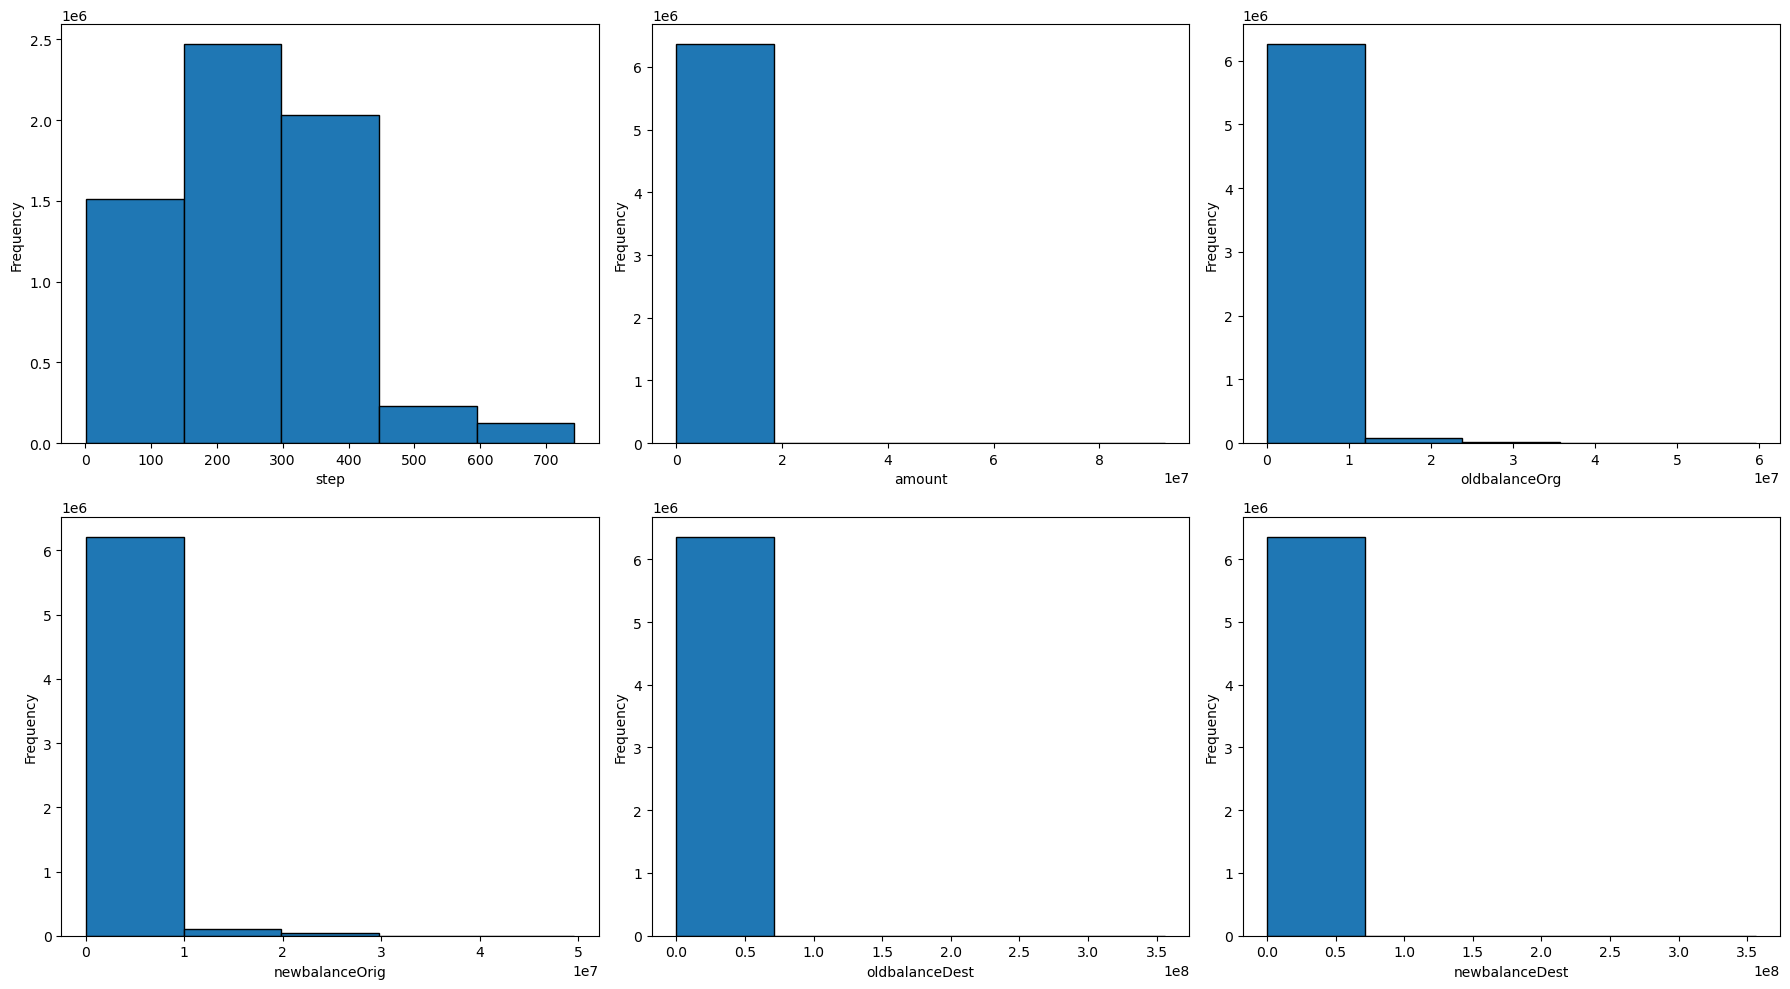

In [15]:
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, ax in zip(features, axes.flatten()):

        OnlinePayment_data[i].plot(kind='hist', bins=5, edgecolor='black', ax=ax)
        ax.set_xlabel(i)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'count of online transaction type ')

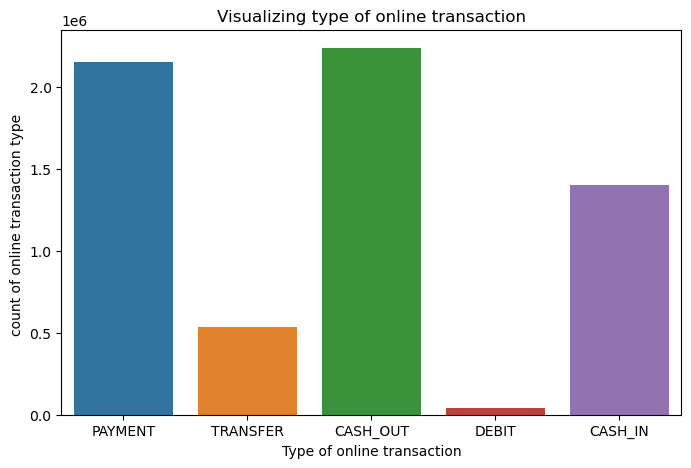

In [16]:
plt.figure(figsize=(8,5))
sns.countplot (x="type", data= OnlinePayment_data)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

<Axes: xlabel='isFraud'>

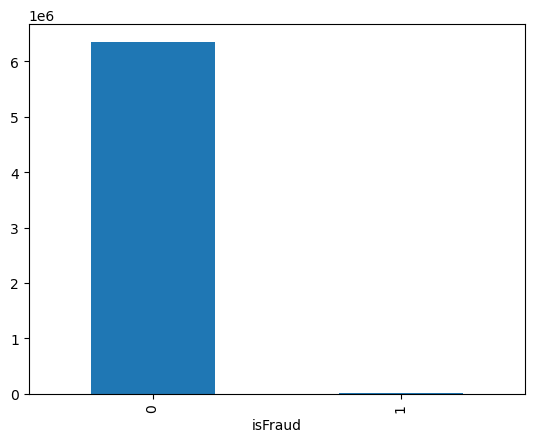

In [17]:
OnlinePayment_data['isFraud'].value_counts().plot(kind = 'bar')

<Axes: xlabel='type', ylabel='amount'>

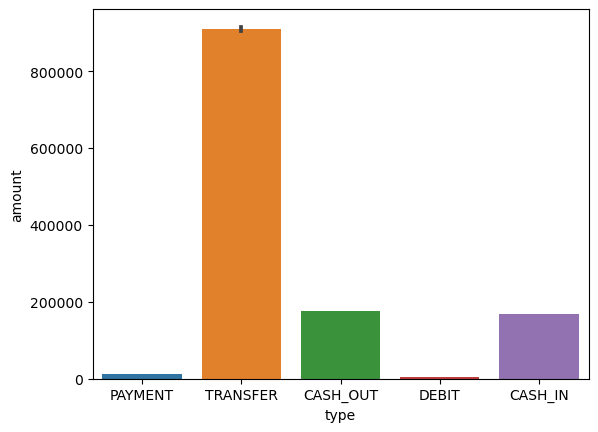

In [18]:
sns.barplot(x='type', y='amount', data=OnlinePayment_data)

type
CASH_OUT    50.11567
TRANSFER    49.88433
Name: count, dtype: float64


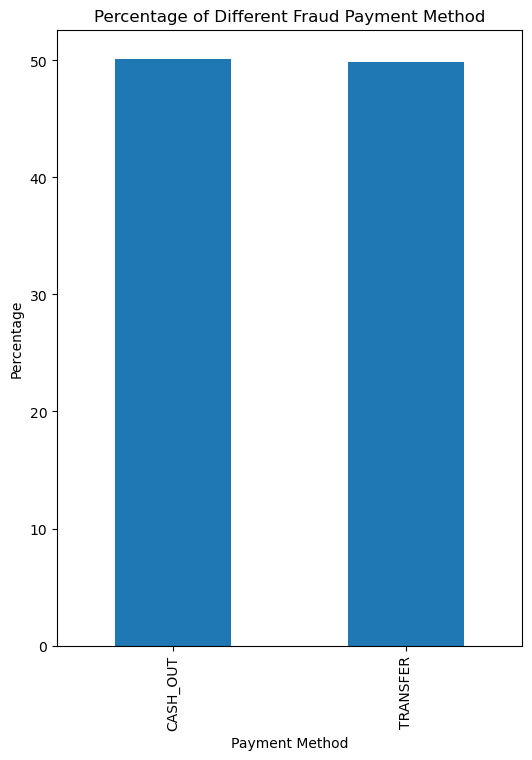

In [19]:
fraud_data = OnlinePayment_data[OnlinePayment_data['isFraud'] == 1]
payment_type_count_fraud = fraud_data['type'].value_counts()
payment_type_percentage_fraud = (payment_type_count_fraud / payment_type_count_fraud.sum()) * 100

print(payment_type_percentage_fraud)

plt.figure(figsize=(6, 8))
payment_type_percentage_fraud.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel("Percentage")
plt.title("Percentage of Different Fraud Payment Method")

plt.show()

### Data Pre-processing

#### Check Null Values

In [20]:
OnlinePayment_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Encording Categorical Data

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

typ = ohe.fit_transform(OnlinePayment_data[['type']]).toarray()
df_1 = pd.DataFrame(typ,columns= ohe.categories_)

handled_category_data = pd.concat([OnlinePayment_data,df_1], axis= 1)
handled_category_data.rename(columns={
    ('CASH_IN',): 'cash_in',
    ('CASH_OUT',): 'cash_out',
    ('DEBIT',): 'debit',
    ('PAYMENT',): 'payment',
    ('TRANSFER',): 'transfer'
}, inplace=True)
handled_category_data = handled_category_data.drop('type', axis=1)
handled_category_data.head(5)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,cash_in,cash_out,debit,payment,transfer
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0


#### Check Outliers in numerical data

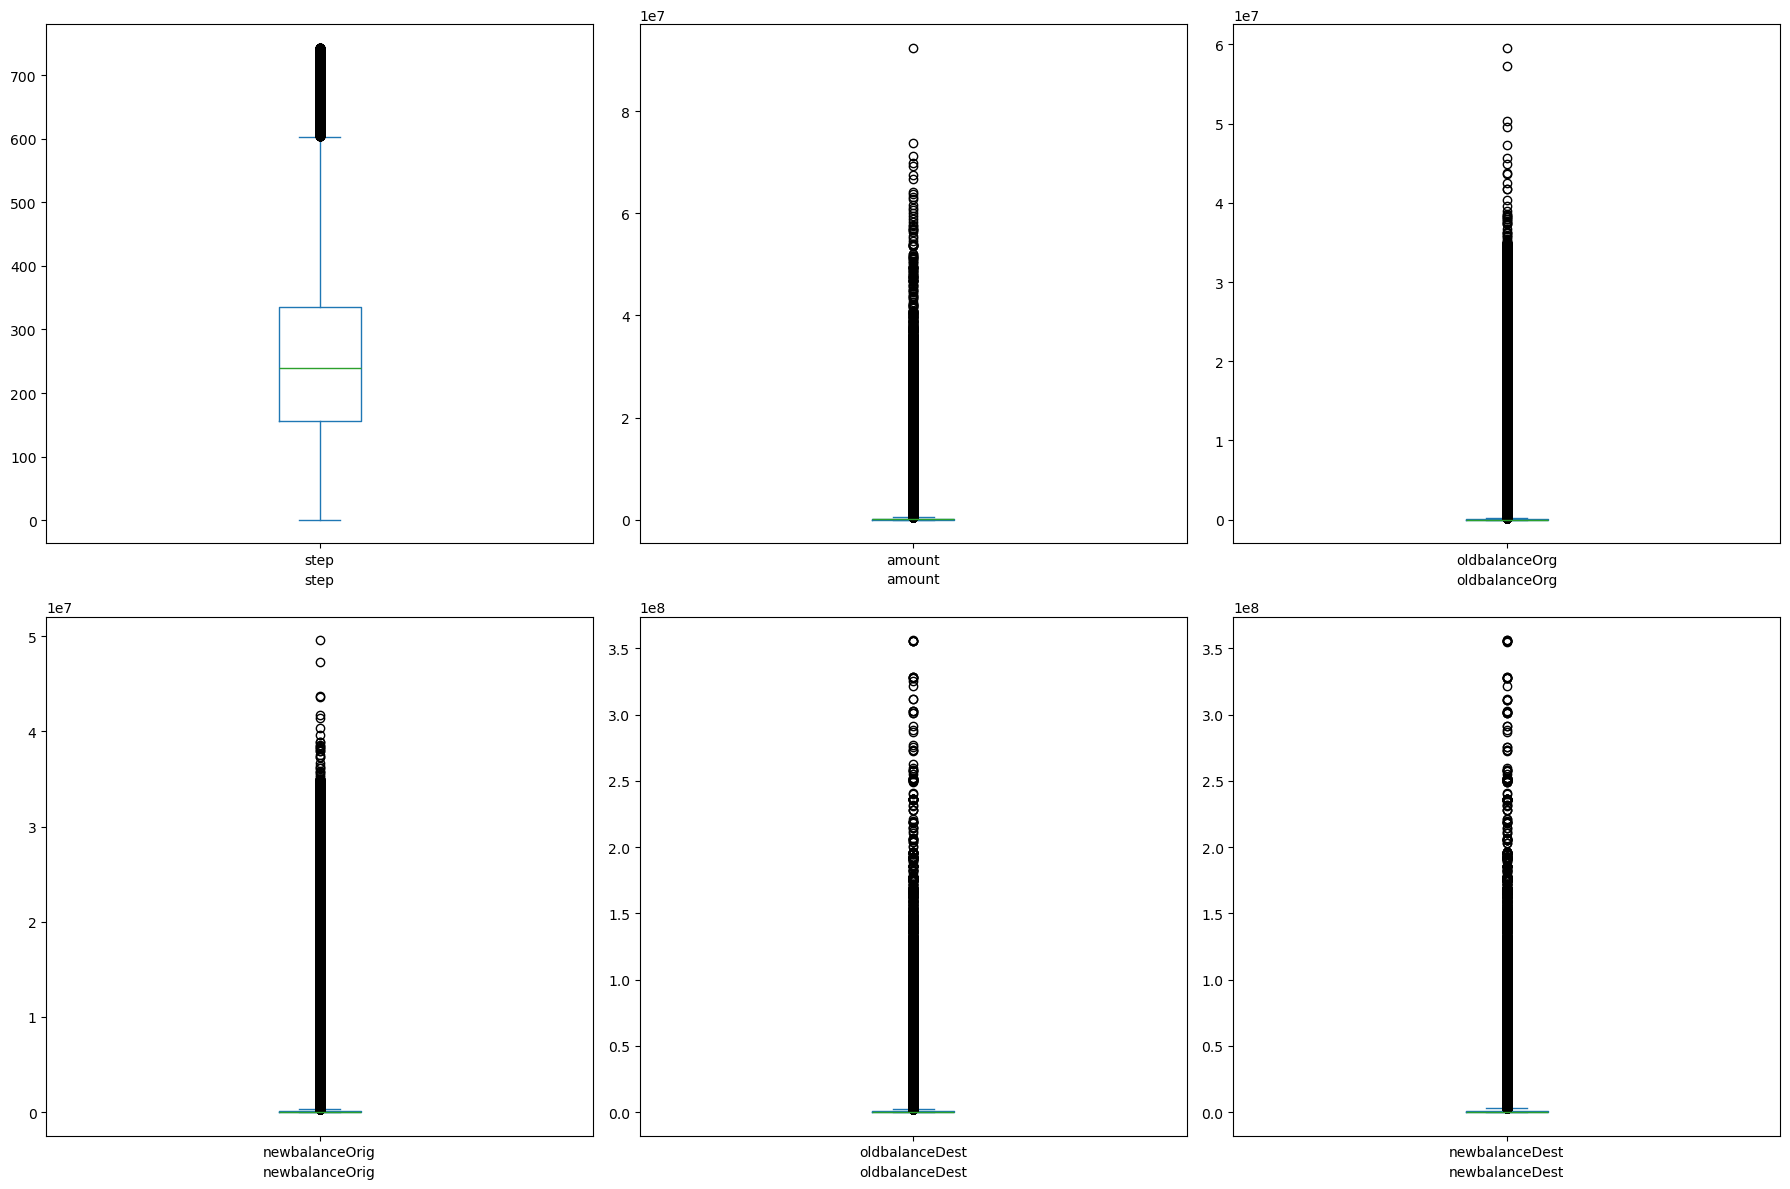

In [22]:
import matplotlib.pyplot as plt

outlier_features = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(18, 12))

for i, feat in enumerate(outlier_features, 1):
    plt.subplot(2, 3, i)
    plt.xlabel(feat)
    handled_category_data[feat].plot(kind='box')
    plt.tight_layout()

plt.show()

#### Normalized Selected Dataframe for Handling Outliers 

In [23]:
from sklearn.preprocessing import MinMaxScaler
data_to_scale = handled_category_data[outlier_features]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_dataframe = pd.DataFrame(scaled_data, columns=outlier_features)

scaled_dataframe.head(5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.000106,0.002855,0.003233,0.000000,0.0
1,0.0,0.000020,0.000357,0.000391,0.000000,0.0
2,0.0,0.000002,0.000003,0.000000,0.000000,0.0
3,0.0,0.000002,0.000003,0.000000,0.000059,0.0
4,0.0,0.000126,0.000697,0.000603,0.000000,0.0


##### Remove Outliers 

In [24]:
selected_features_data = scaled_dataframe
handled_category_data = handled_category_data.drop(['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

Q1 = selected_features_data.quantile(0.25)
Q3 = selected_features_data.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

remove_outliers_data = selected_features_data[~((selected_features_data < (Q1 - threshold * IQR)) | (selected_features_data > (Q3 + threshold * IQR))).any(axis=1)]
remove_outliers_data.shape

(4321893, 6)

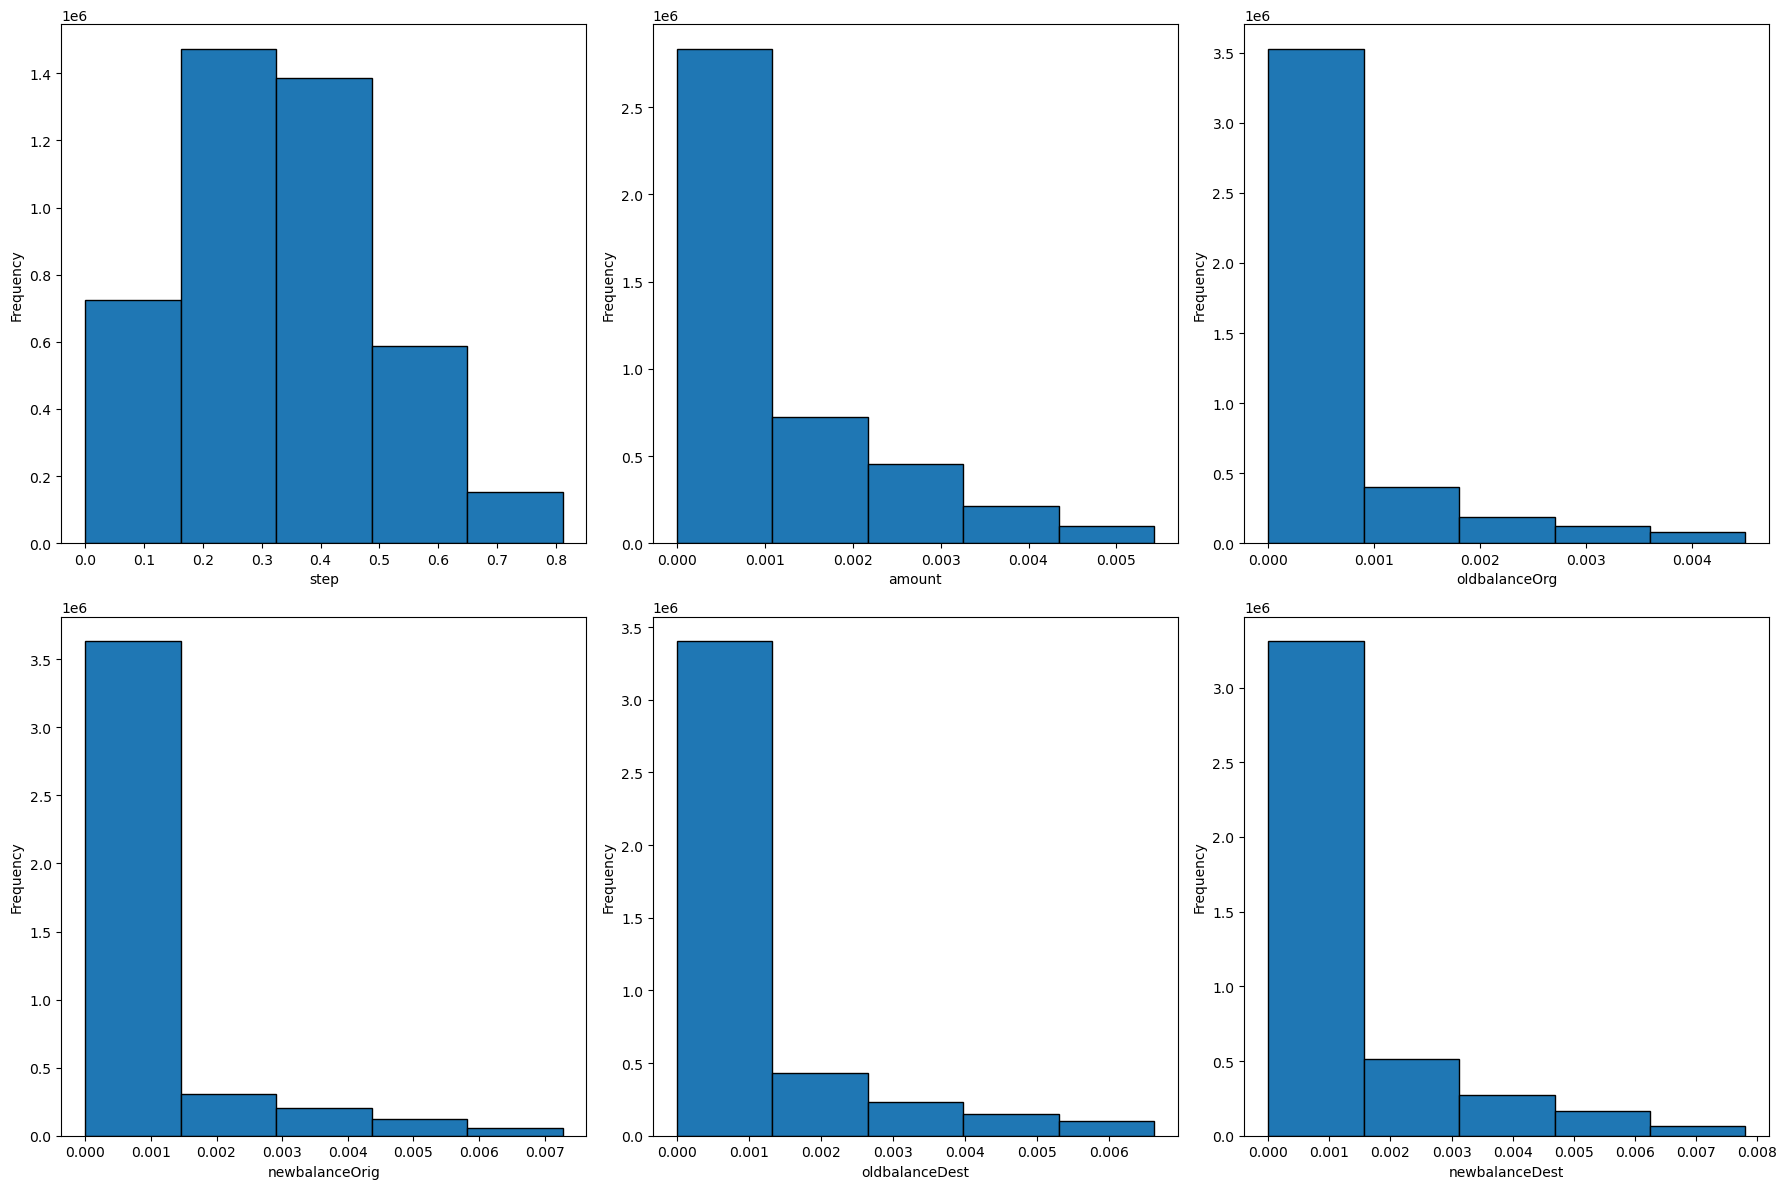

In [25]:
#Visualize the dataframe after the outlier removed
feature = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, ax in zip(feature, axes.flatten()):
    remove_outliers_data[i].plot(kind='hist', bins=5, edgecolor='black', ax=ax)
    ax.set_xlabel(i)

plt.tight_layout()
plt.show()

In [26]:
remove_outliers_data.shape

(4321893, 6)

In [27]:
handled_category_data.shape

(6362620, 9)

In [28]:
#merge the two dataframe to get all the features
merged_data = pd.merge(handled_category_data,remove_outliers_data,left_index=True, right_index=True,how='left')
merged_data.head(5)

,nameOrig,nameDest,isFraud,isFlaggedFraud,cash_in,cash_out,debit,payment,transfer,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,C1231006815,M1979787155,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000106,0.002855,0.003233,0.000000,0.0
1,C1666544295,M2044282225,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000020,0.000357,0.000391,0.000000,0.0
2,C1305486145,C553264065,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.000002,0.000003,0.000000,0.000000,0.0
3,C840083671,C38997010,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.000002,0.000003,0.000000,0.000059,0.0
4,C2048537720,M1230701703,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000126,0.000697,0.000603,0.000000,0.0


In [29]:
#check null values in the merged dataframe
merged_data.isnull().sum()

nameOrig                0
nameDest                0
isFraud                 0
isFlaggedFraud          0
cash_in                 0
cash_out                0
debit                   0
payment                 0
transfer                0
step              2040727
amount            2040727
oldbalanceOrg     2040727
newbalanceOrig    2040727
oldbalanceDest    2040727
newbalanceDest    2040727
dtype: int64

<Axes: >

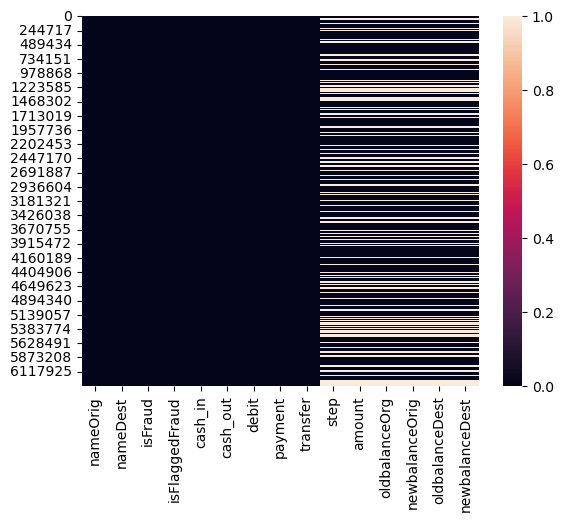

In [30]:
sns.heatmap(data=merged_data.isnull())

#### Handling missing values using delete rows

In [31]:
removed_null_data = merged_data.dropna(axis=0)
removed_null_data.isnull().sum()

nameOrig          0
nameDest          0
isFraud           0
isFlaggedFraud    0
cash_in           0
cash_out          0
debit             0
payment           0
transfer          0
step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [32]:
final_data = removed_null_data.copy()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4321893 entries, 0 to 6259931
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   nameOrig        object 
 1   nameDest        object 
 2   isFraud         int64  
 3   isFlaggedFraud  int64  
 4   cash_in         float64
 5   cash_out        float64
 6   debit           float64
 7   payment         float64
 8   transfer        float64
 9   step            float64
 10  amount          float64
 11  oldbalanceOrg   float64
 12  newbalanceOrig  float64
 13  oldbalanceDest  float64
 14  newbalanceDest  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 527.6+ MB


### Feature Engineering

correlation indicate whether there is a linear relationship between two numerical variables. Using correlation heatmap Select only the features which matter the most

Text(0.5, 1.0, 'Correlation Heatmap')

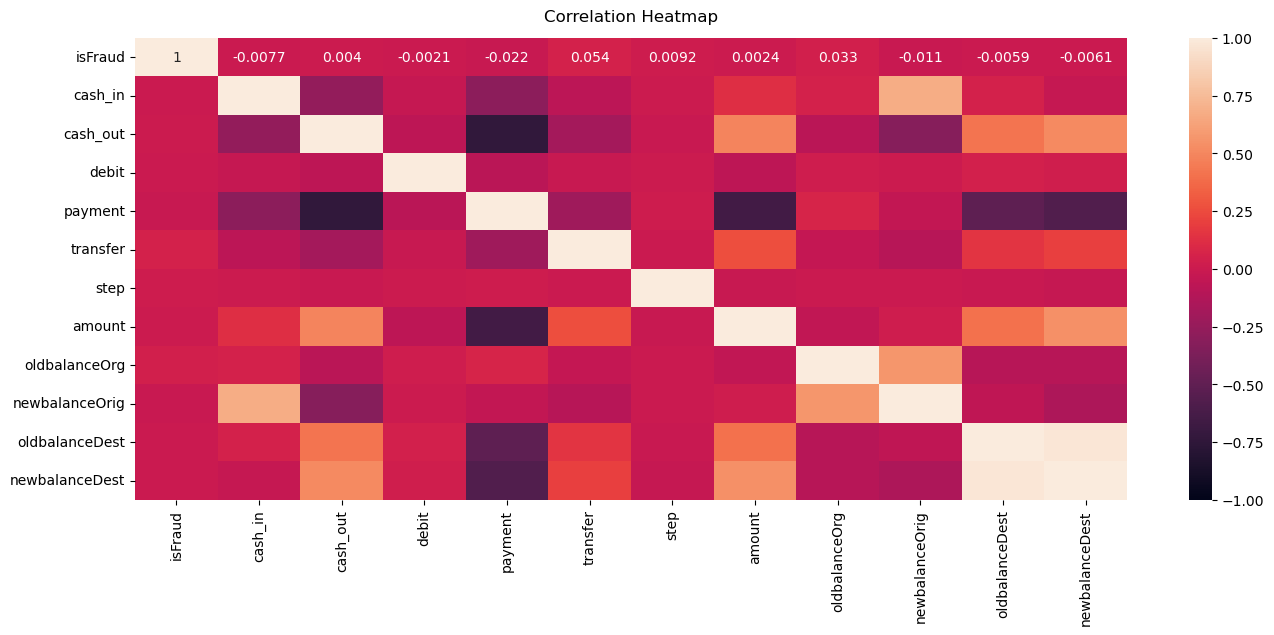

In [33]:
final_data = final_data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(final_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [34]:
# Select only the features which matter the most
cor = final_data.corr()
corr_data = abs(cor['isFraud'])
corr_features = corr_data[corr_data>0.01]
corr_features

isFraud           1.000000
payment           0.021908
transfer          0.053539
oldbalanceOrg     0.032821
newbalanceOrig    0.011246
Name: isFraud, dtype: float64

### Splitting data into train and test

In [35]:
from sklearn.model_selection import train_test_split

target_col = final_data['isFraud']
features_cols = final_data[['oldbalanceOrg','newbalanceOrig','payment','transfer']]

x_train, x_test, y_train, y_test = train_test_split(features_cols,target_col, test_size=0.2, random_state=0)

### Feature Scaling

In [36]:
#scale the features which want to build the model
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### Handling imbalance Target variable using SMOTE

<Axes: xlabel='isFraud'>

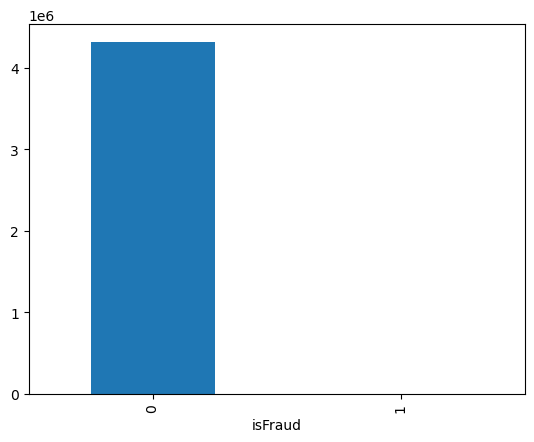

In [37]:
target_col.value_counts().plot(kind='bar')

In [38]:
# Handling imbalancing training dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print("Original Dataset shape :" , Counter(y_train))
print("Re-sample Dataset shape :" , Counter(y_smote))

Original Dataset shape : Counter({0: 3455513, 1: 2001})
Re-sample Dataset shape : Counter({0: 3455513, 1: 3455513})


<Axes: xlabel='isFraud'>

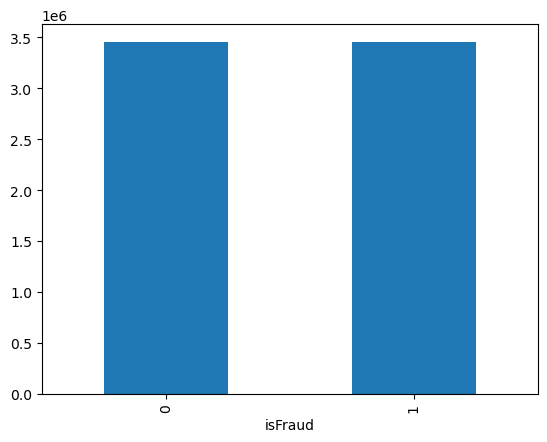

In [39]:
# visualize the balanced target variable
y_smote.value_counts().plot(kind='bar')

## Model Building

###     Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(x_smote, y_smote)

LogisticRegression(random_state=0)

##### Prediction and test set results

In [41]:
y_prediction_log = logistic_classifier.predict(x_test)

print(np.concatenate((y_prediction_log.reshape(len(y_prediction_log),1),y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


##### Confusion matrix for logistic regression model

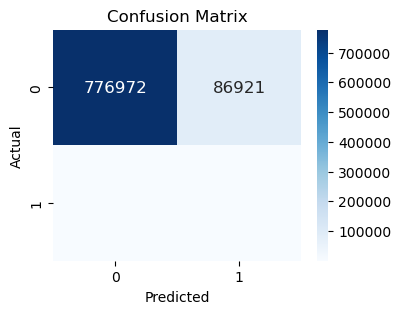

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_prediction_log)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Training and test accuracy check using Accuracy Score

In [43]:
from sklearn.metrics import accuracy_score

y_train_prediction = logistic_classifier.predict(x_smote)
train_accuracy = accuracy_score(y_smote, y_train_prediction)
print("Training Accuracy of logistic regression model : ", train_accuracy)

accuracy = accuracy_score(y_test, y_prediction_log)
print("Test Accuracy of logistic regression model     : ", accuracy)

Training Accuracy of logistic regression model :  0.8836734227305757
Test Accuracy of logistic regression model     :  0.8993716876509031


##### Model accuracy check Precision and Recall for logistic regression model

In [44]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_prediction_log, zero_division=1)
recall = recall_score(y_test, y_prediction_log, zero_division=1)

print('Precision: %.3f' % precision)
print('Recall   : %.3f' % recall)

Precision: 0.005
Recall   : 0.877


##### Model Performance check using ROC curve 

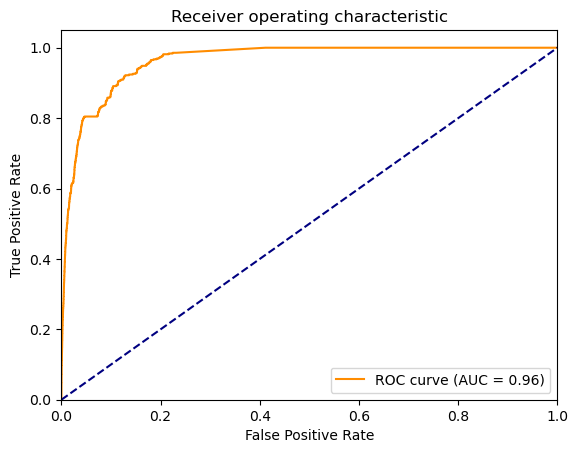

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = logistic_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##### Hyperparameter tuning to tweak Logistic regression model performance

In [46]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
log_clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=5, scoring="accuracy")
log_clf.fit(x_smote,y_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [47]:
print("Best combination of tuned hyperparameters : ",log_clf.best_params_)
print("The average cross-validated score of logistic regression : ",log_clf.best_score_)

Best combination of tuned hyperparameters :  {'C': 100}
The average cross-validated score of logistic regression :  0.8832779677433956


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(x_smote, y_smote)


RandomForestClassifier(random_state=0)

##### Prediction and test set results

In [49]:
y_prediction_rf = random_forest_classifier.predict(x_test)
concatenated_array_rf = np.concatenate((y_prediction_rf.reshape(len(y_prediction_rf),1), y_test.to_numpy().reshape(len(y_test),1)), axis=1)
print(concatenated_array_rf)

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


##### Confusion matrix for Random Forest regression model

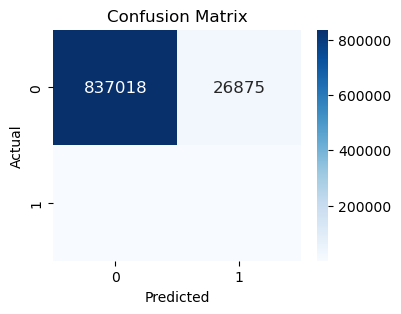

In [50]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_prediction_rf)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##### Training and test accuracy check using Accuracy Score

In [51]:
from sklearn.metrics import accuracy_score

y_train_prediction_rf = random_forest_classifier.predict(x_smote)
train_accuracy_rf = accuracy_score(y_smote, y_train_prediction_rf)
print("Training Accuracy of random forest model: ", train_accuracy_rf)

accuracy_rf = accuracy_score(y_test, y_prediction_rf)
print("Test Accuracy of random forest model: ", accuracy_rf)


Training Accuracy of random forest model:  0.9923795685329501
Test Accuracy of random forest model:  0.9687810555323533


##### Model accuracy check Precision and Recall for Random Forest model

In [52]:
from sklearn.metrics import precision_score, recall_score

precision_rf = precision_score(y_test, y_prediction_rf, zero_division=1)
recall_rf = recall_score(y_test, y_prediction_rf, zero_division=1)

print('Precision: %.3f' % precision_rf)
print('Recall   : %.3f' % recall_rf)


Precision: 0.014
Recall   : 0.774


##### Model Performance check using ROC curve 

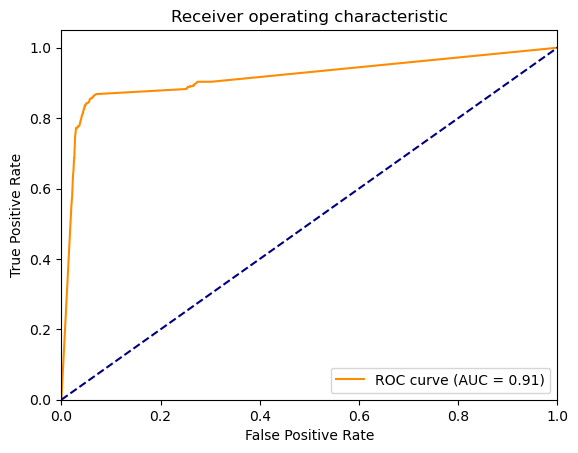

In [53]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities using random forest classifier
y_pred_rf = random_forest_classifier.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

# Compute the area under the ROC curve (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
